# Optimizing Hyperparameters - Random Forest for the decade 2011-2020

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
# Set a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [3]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [4]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [6]:
X.shape

(22950, 137)

In [7]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
answers.shape

(22950, 16)

# Data Wrangling


In [9]:
# Reduce observations dataset to decade (2011-2020)

dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2011') & (X['DATE'].astype(str).str[:4] <= '2020')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18628,20110101,1,8,0.97,1.0232,0.13,0.00,0.0,-0.2,-0.8,0.3,4,0.92,1.0227,0.64,0.00,3.1,-5.5,-8.6,-2.3,4,0.67,1.017,0.38,0.00,1.4,-1.7,-4.8,0.1,6,0.93,1.0211,0.22,0.06,1.2,3.5,-0.3,5.9,6,0.95,1.0212,0.12,0.07,0.0,1.3,-4.1,2.9,8,0.86,1.0250,0.13,0.06,0.0,5.9,4.6,4.0,6,0.93,1.0194,0.17,0.20,0.2,0.2,-2.4,2.4,3,0.98,1.0200,0.43,0.00,3.5,-4.2,-7.5,-1.3,7,0.99,1.0222,0.12,0.06,0.0,1.4,-0.3,2.4,6,0.87,1.0206,0.79,0.00,3.8,8.2,5.2,11.3,8,0.93,1.0232,0.20,0.07,0.0,-0.7,-1.6,0.1,3,0.53,1.0022,1.06,0.00,4.6,2.1,-2.3,5.1,0,0.67,1.0281,0.87,0.00,7.8,-7.1,-8.8,-5.3,8,0.53,0.9920,0.05,0.17,0.0,-2.3,-4.2,-0.5,5,0.82,1.0142,0.13,0.41,3.4,10.7,7.9,6.6
18629,20110102,1,8,0.94,1.0234,0.13,0.00,0.0,-0.2,-3.9,1.4,8,0.90,1.0190,0.25,0.01,0.0,-3.1,-7.4,-2.1,4,0.67,1.017,0.57,0.00,4.2,0.7,-1.3,3.1,4,0.87,1.0238,0.41,0.00,5.7,2.3,-0.7,5.3,6,0.92,1.0234,0.28,0.00,2.0,-0.5,-4.1,3.0,8,0.79,1.0283,0.15,0.00,0.1,3.0,1.9,2.9,6,0.84,1.0209,0.22,0.07,0.7,0.7,-0.1,1.5,8,0.98,1.0197,0.12,0.05,0.0,-2.0,-5.7,-0.9,7,0.98,1.0246,0.24,0.00,0.5,0.1,-2.3,1.6,3,0.80,1.0195,0.93,0.00,5.0,8.9,6.0,11.8,7,0.87,1.0234,0.33,0.06,0.8,-0.7,-2.9,0.8,2,0.52,1.0137,1.06,0.00,4.6,-0.8,-4.5,2.5,5,0.97,1.0303,0.95,0.66,5.9,-13.9,-20.0,-7.8,8,0.52,1.0073,0.05,0.03,0.0,-3.6,-6.0,-2.4,5,0.82,1.0142,0.15,0.41,3.4,10.7,7.9,5.4
18630,20110103,1,4,0.93,1.0254,0.64,0.00,6.1,-3.3,-5.2,-0.9,7,0.91,1.021

In [10]:
# Reduce answers dataset to period 2011-2020

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2011') & (answers['DATE'].astype(str).str[:4] <= '2020')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18628,20110101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18629,20110102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18630,20110103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18631,20110104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18632,20110105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22277,20201228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22278,20201229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22279,20201230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [12]:
dfdecade.shape # observations dataset has the correct shape

(3653, 135)

In [13]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [14]:
answers_decade.shape # predictions dataset has the correct shape

(3653, 15)

# Reshaping for Modeling
The final shapes should be X = (3653, 135) and y = (3653,) for one decade of information.

In [15]:
X = dfdecade

In [16]:
y = answers_decade

In [17]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [18]:
X.shape

(3653, 135)

In [19]:
y.shape

(3653, 15)

# Data Split 

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


# Hyperparameter Optimization

# Grid Search

In [22]:
# Create a RF classifier

clf = RandomForestClassifier()

In [100]:
# Grid search
grid_space={'max_depth':[3,5,7,None],
              'n_estimators':[10,50,200],
              'max_features':[15, 50, 400], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }


In [101]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Search took 5.095375080903371 minutes


In [102]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6568090543994158


# Random Search

In [103]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 100, step=10),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [104]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [105]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 0.3790257811546326 minutes


In [106]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 78, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 80}
Best RANDOM search score is: 0.6447608616283316


In [107]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6568090543994158
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 78, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 80}
Best RANDOM search score is: 0.6447608616283316


# The GRID Search gave a better accuracy score, so let's use those hyperparameters to optimize the random forest.

# Running Random Forest with Optimized Search Parameters

In [108]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=50, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=200)

In [109]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6969365426695843


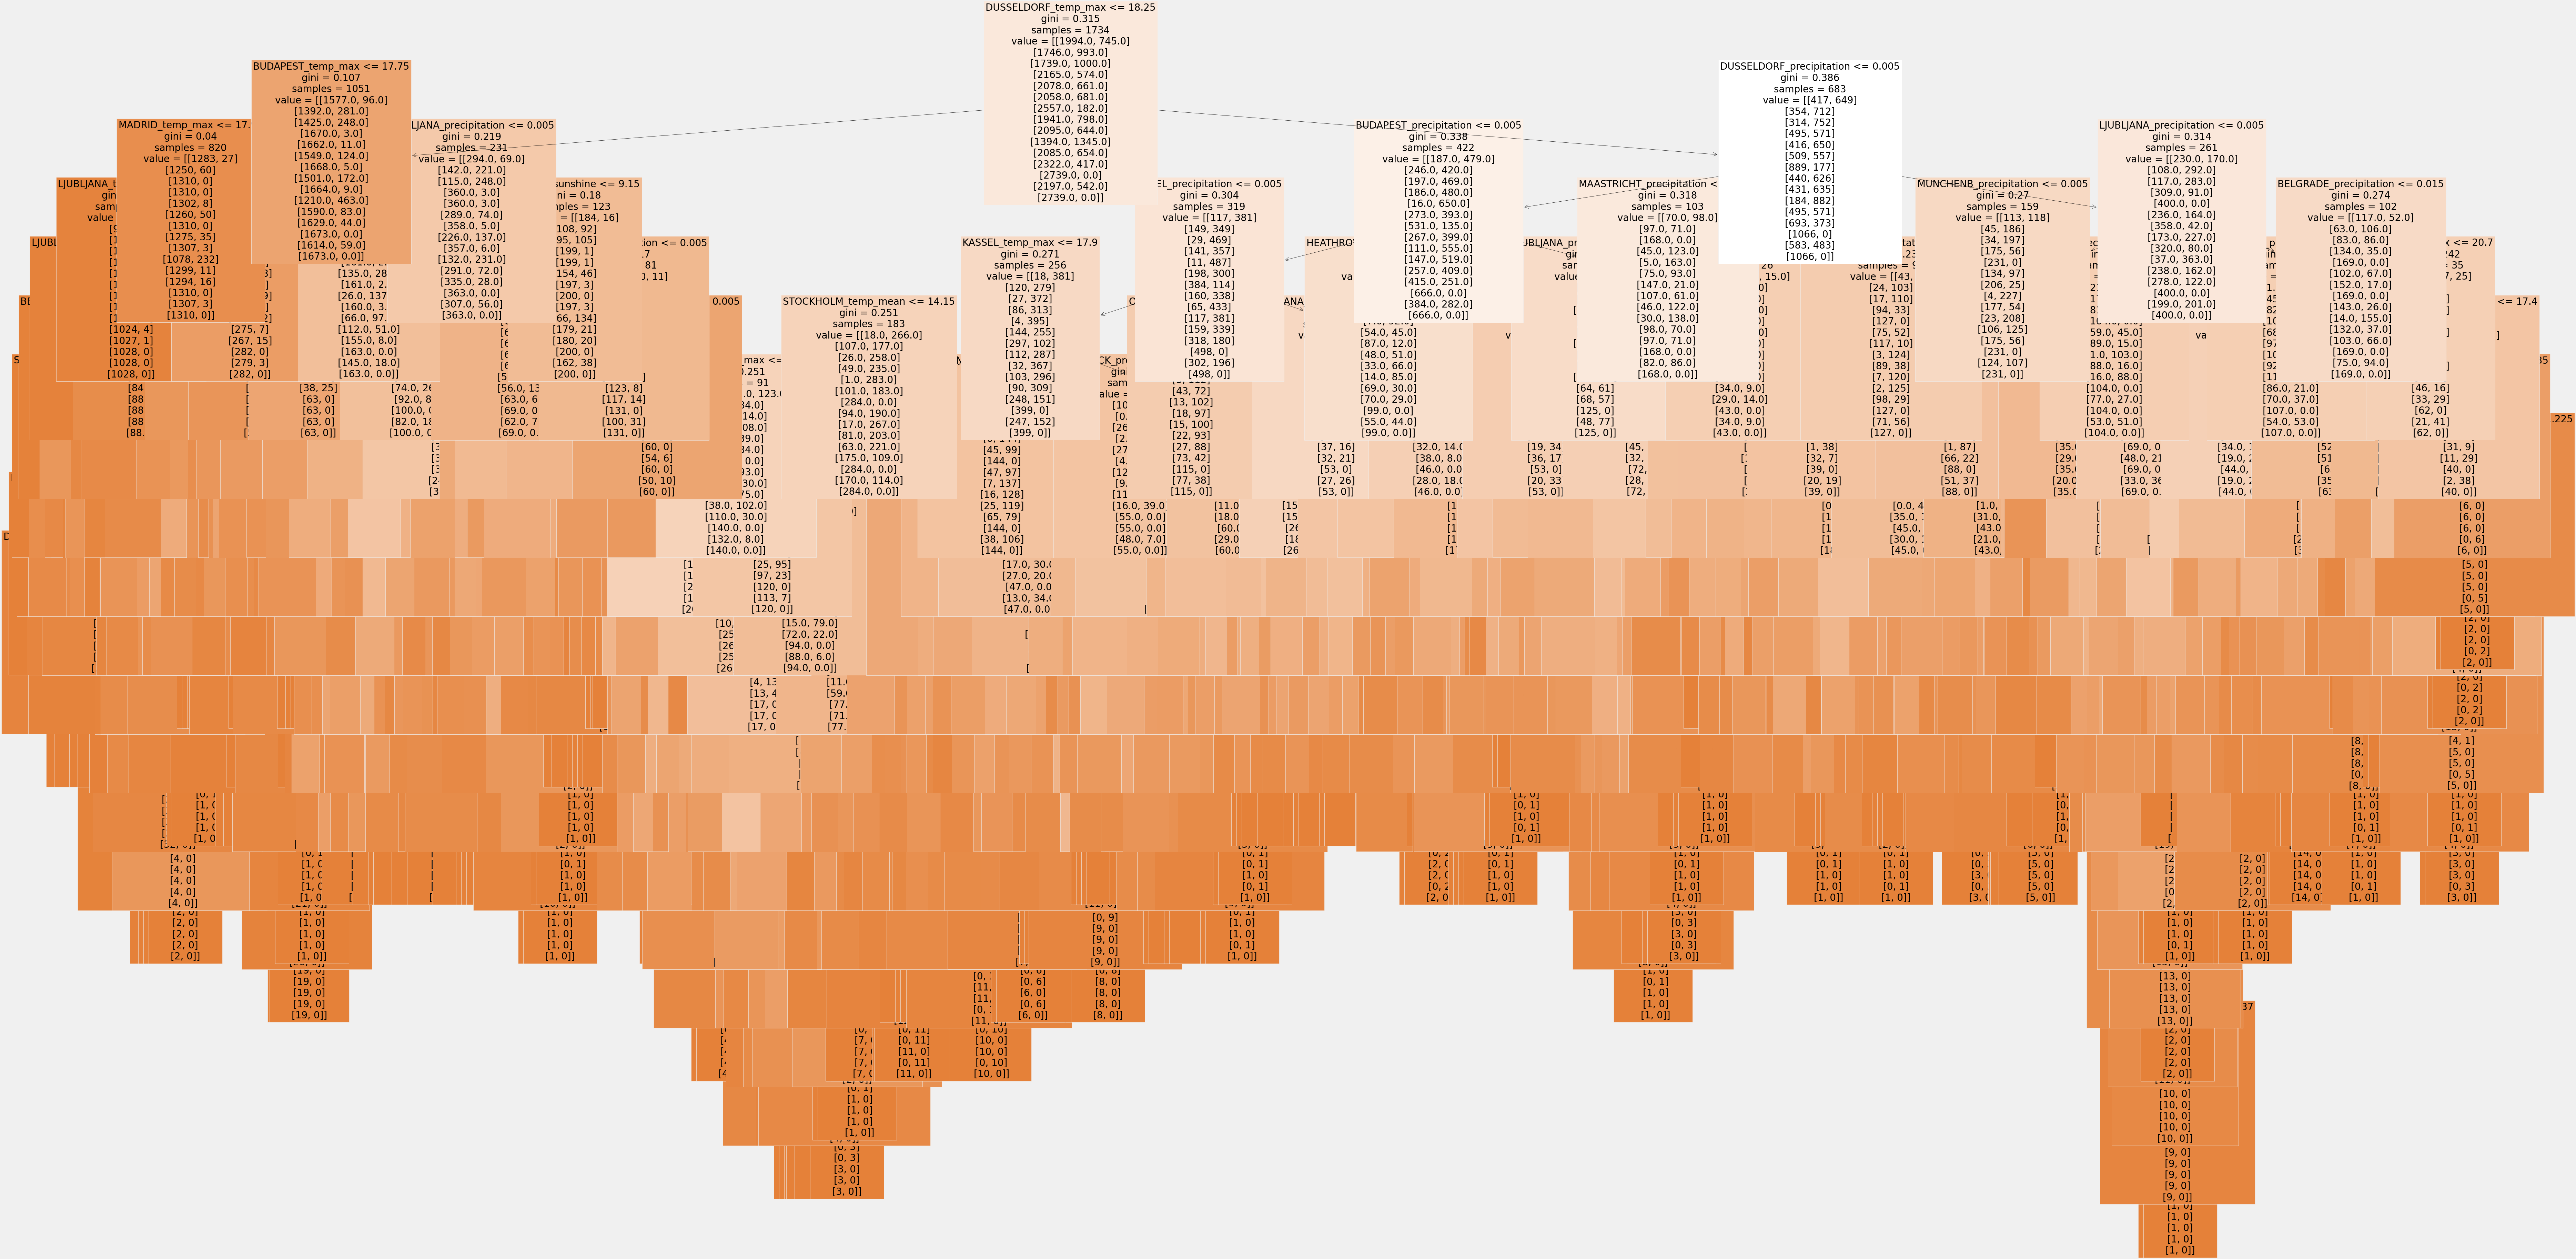

In [110]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [111]:
fig.savefig(os.path.join(path, 'Visualizations', 'optimized_random_forest_decade.png'),bbox_inches='tight')

# Uncovering Feature Importances

In [112]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.77050780e-03, 2.34720008e-03, 2.05849049e-03, 2.16313013e-03,
       3.01813326e-02, 4.58709686e-03, 1.00028653e-02, 2.04003260e-03,
       6.71082767e-02, 3.26017551e-03, 2.16526956e-03, 2.48857548e-03,
       1.89925336e-03, 3.09888638e-02, 2.28351362e-03, 4.03353601e-03,
       1.96190829e-03, 7.87850060e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.70522056e-04, 2.54972519e-02, 4.84874311e-04,
       7.82987988e-03, 2.19329977e-03, 2.12222602e-02, 1.59101300e-03,
       1.93444255e-03, 2.45140915e-03, 2.53198821e-03, 2.23694072e-02,
       2.84036735e-03, 2.49446820e-03, 2.00102388e-03, 4.14723292e-02,
       1.35208502e-03, 1.93024227e-03, 2.14811010e-03, 2.22013448e-03,
       3.32089542e-02, 3.76268903e-03, 5.10468699e-03, 2.12341023e-03,
       1.11653513e-01, 1.82130041e-03, 3.09133627e-03, 2.48521195e-03,
       3.10237847e-03, 1.60946790e-02, 3.53256787e-03, 3.22027381e-03,
       2.01460533e-03, 8.78633663e-03, 1.37035272e-03, 1.46909102e-03,
      

In [113]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.77050780e-03, 2.34720008e-03, 2.05849049e-03, 2.16313013e-03,
         3.01813326e-02, 4.58709686e-03, 1.00028653e-02, 2.04003260e-03,
         6.71082767e-02],
        [3.26017551e-03, 2.16526956e-03, 2.48857548e-03, 1.89925336e-03,
         3.09888638e-02, 2.28351362e-03, 4.03353601e-03, 1.96190829e-03,
         7.87850060e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.70522056e-04,
         2.54972519e-02, 4.84874311e-04, 7.82987988e-03, 2.19329977e-03,
         2.12222602e-02],
        [1.59101300e-03, 1.93444255e-03, 2.45140915e-03, 2.53198821e-03,
         2.23694072e-02, 2.84036735e-03, 2.49446820e-03, 2.00102388e-03,
         4.14723292e-02],
        [1.35208502e-03, 1.93024227e-03, 2.14811010e-03, 2.22013448e-03,
         3.32089542e-02, 3.76268903e-03, 5.10468699e-03, 2.12341023e-03,
         1.11653513e-01],
        [1.82130041e-03, 3.09133627e-03, 2.48521195e-03, 3.10237847e-03,
         1.60946790e-02, 3.53256787e-03, 3.22027381e-03, 2.01460533

In [114]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12225893, 0.0569596 , 0.05779809, 0.07968645, 0.16350382,
       0.04414869, 0.01928486, 0.08660894, 0.12913086, 0.07182755,
       0.06606376, 0.04343048, 0.01837829, 0.0388749 , 0.00204478])

In [115]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [116]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [117]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [118]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

HEATHROW      0.163504
MAASTRICHT    0.129131
DEBILT        0.122259
MUNCHENB      0.086609
DUSSELDORF    0.079686
OSLO          0.071828
SONNBLICK     0.066064
STOCKHOLM     0.057798
BELGRADE      0.056960
KASSEL        0.044149
VALENTIA      0.043430
LJUBLJANA     0.038875
BUDAPEST      0.019285
MADRID        0.018378
BASEL         0.002045
dtype: float64

In [119]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['DEBILT', 'BELGRADE', 'STOCKHOLM', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'BUDAPEST', 'MUNCHENB', 'MAASTRICHT', 'OSLO', 'SONNBLICK', 'VALENTIA', 'MADRID', 'LJUBLJANA', 'BASEL']


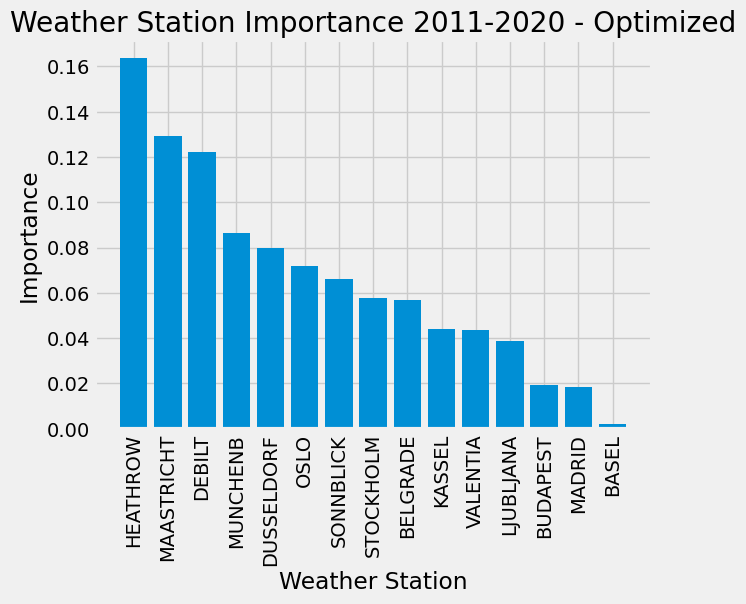

[CV 3/3] END max_depth=7, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.538 total time=   0.1s
[CV 1/3] END max_depth=7, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.537 total time=   0.7s
[CV 1/3] END max_depth=7, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.544 total time=   1.2s
[CV 1/3] END max_depth=7, max_features=15, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.539 total time=   1.2s
[CV 2/3] END max_depth=7, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.519 total time=   0.1s
[CV 2/3] END max_depth=7, max_features=15, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.542 total time=   0.6s
[CV 2/3] END max_depth=7, max_features=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.510 total time=   0.1s
[CV 2/3] END max_depth=7, max_features=15, min_samples_leaf=3, min_

In [120]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2011-2020 - Optimized')

plt.savefig(os.path.join(path, 'Visualizations', 'optimized_decade_feature_importances.png'), bbox_inches='tight')

plt.show()